Python imports

In [1]:
import xarray as xr
from rio_tiler.io import XarrayReader
import matplotlib.pyplot as plt
import s3fs

ModuleNotFoundError: No module named 'rio_tiler'

Demo

In [3]:
demo_ds = xr.open_dataset(
    "https://pangeo.blob.core.windows.net/pangeo-public/daymet-rio-tiler/na-wgs84.zarr/",
    engine="zarr",
    decode_coords="all",
    consolidated=True,
)

In [4]:
demo_ds

<xarray.Dataset>
Dimensions:                  (time: 1, y: 3728, x: 17268)
Coordinates:
    lambert_conformal_conic  int64 ...
  * time                     (time) datetime64[ns] 1980-07-01T12:00:00
  * x                        (x) float64 -180.0 -180.0 -179.9 ... 180.0 180.0
  * y                        (y) float64 83.78 83.76 83.74 ... 6.126 6.105 6.084
Data variables:
    tmax                     (time, y, x) float32 ...
Attributes:
    Conventions:       CF-1.6
    Version_data:      Daymet Data Version 4.0
    Version_software:  Daymet Software Version 4.0
    citation:          Please see http://daymet.ornl.gov/ for current Daymet ...
    references:        Please see http://daymet.ornl.gov/ for current informa...
    source:            Daymet Software Version 4.0
    start_year:        1980

In [5]:
demo_da = demo_ds["tmax"]
demo_da

<xarray.DataArray 'tmax' (time: 1, y: 3728, x: 17268)>
[64375104 values with dtype=float32]
Coordinates:
    lambert_conformal_conic  int64 ...
  * time                     (time) datetime64[ns] 1980-07-01T12:00:00
  * x                        (x) float64 -180.0 -180.0 -179.9 ... 180.0 180.0
  * y                        (y) float64 83.78 83.76 83.74 ... 6.126 6.105 6.084
Attributes:
    cell_methods:  area: mean time: maximum within days time: mean over days
    coordinates:   lon lat
    long_name:     annual average of daily maximum temperature
    units:         degrees C

In [6]:
with XarrayReader(demo_da) as dstx:
    imgx = dstx.tile(1, 1, 2)

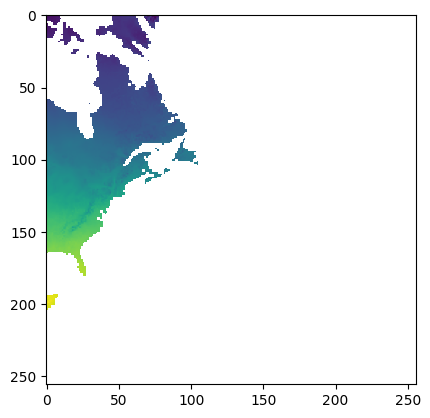

In [7]:
plt.imshow(imgx.data_as_image())

# IMOS SST

In [2]:
import xarray as xr
store_path = 's3://imos-data-lab-optimised/4428/dummy_sst/backup/'
data = xr.open_zarr(store_path, consolidated=True, chunks={})
data

<xarray.Dataset>
Dimensions:                  (time: 26, lat: 4500, lon: 6000)
Coordinates:
  * lat                      (lat) float32 19.99 19.97 19.95 ... -69.97 -69.99
  * lon                      (lon) float32 70.01 70.03 70.05 ... 190.0 190.0
  * time                     (time) datetime64[ns] 2022-01-01T03:20:00 ... 20...
Data variables:
    dt_analysis              (time, lat, lon) float32 dask.array<chunksize=(10, 1000, 1000), meta=np.ndarray>
    l2p_flags                (time, lat, lon) float32 dask.array<chunksize=(10, 1000, 1000), meta=np.ndarray>
    quality_level            (time, lat, lon) float32 dask.array<chunksize=(10, 1000, 1000), meta=np.ndarray>
    satellite_zenith_angle   (time, lat, lon) float32 dask.array<chunksize=(10, 1000, 1000), meta=np.ndarray>
    sea_surface_temperature  (time, lat, lon) float32 dask.array<chunksize=(10, 1000, 1000), meta=np.ndarray>
    sses_bias                (time, lat, lon) float32 dask.array<chunksize=(10, 1000, 1000), meta=np.ndarray>
    sses_count               (time, lat, lon) float32 dask.array<chunksize=(10, 1000, 1000), meta=np.ndarray>
    sses_standard_deviation  (time, lat, lon) float32 dask.array<chunksize=(10, 1000, 1000), meta=np.ndarray>
    sst_dtime                (time, lat, lon) float64 dask.array<chunksize=(10, 1000, 1000), meta=np.ndarray>
Attributes: (12/47)
    Conventions:                CF-1.6
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    Metadata_Link:              TBA
    acknowledgment:             Any use of these data requires the following ...
    cdm_data_type:              grid
    comment:                    HRPT AVHRR experimental L3 retrieval produced...
    ...                         ...
    summary:                    Skin SST retrievals produced from stitching t...
    time_coverage_end:          20220121T014906Z
    time_coverage_start:        20220120T204537Z
    title:                      IMOS L3S Daytime gridded multiple-sensor mult...
    uuid:                       47c7cd30-8f1b-4e92-81c4-ca385fc6ce37
    westernmost_longitude:      70.01000213623047

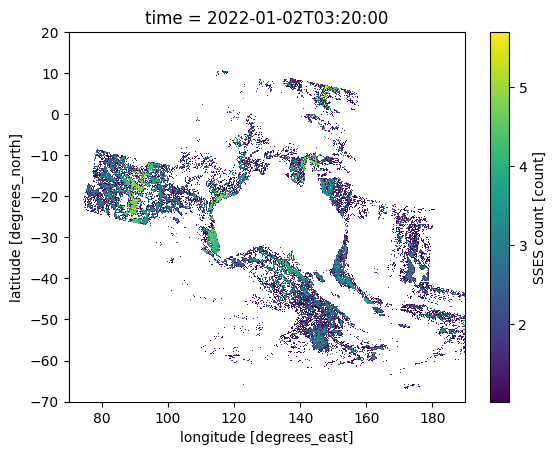

In [7]:
data["sses_count"][[1]].plot()

In [8]:
da_surface_temp = data['sea_surface_temperature']
da_surface_temp = da_surface_temp[[25]]
da_surface_temp

<xarray.DataArray 'sea_surface_temperature' (time: 1, lat: 4500, lon: 6000)>
dask.array<getitem, shape=(1, 4500, 6000), dtype=float32, chunksize=(1, 1000, 1000), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 19.99 19.97 19.95 19.93 ... -69.95 -69.97 -69.99
  * lon      (lon) float32 70.01 70.03 70.05 70.07 ... 189.9 189.9 190.0 190.0
  * time     (time) datetime64[ns] 2022-01-26T03:20:00
Attributes:
    comment:        The skin temperature of the ocean at a depth of approxima...
    long_name:      sea surface skin temperature
    standard_name:  sea_surface_skin_temperature
    units:          kelvin
    valid_max:      32767
    valid_min:      -32767

In [28]:
xx = [
{"name": "xx", "val": 1},
{"name": "yy", "val": 2}
]
xx

[{'name': 'xx', 'val': 1}, {'name': 'yy', 'val': 2}]

In [31]:
rr = "xx"

for i in xx:
    if i["name"] == rr:
        z = i["val"]
        
print(z)
        

1


In [11]:
da_surface_temp = data['sea_surface_temperature']
da_surface_temp = da_surface_temp[[7000]]
da_surface_temp

<xarray.DataArray 'sea_surface_temperature' (time: 1, lat: 4500, lon: 6000)>
dask.array<getitem, shape=(1, 4500, 6000), dtype=float32, chunksize=(1, 1000, 1000), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 19.99 19.97 19.95 19.93 ... -69.95 -69.97 -69.99
  * lon      (lon) float32 70.01 70.03 70.05 70.07 ... 189.9 189.9 190.0 190.0
  * time     (time) datetime64[ns] 2011-06-17T03:20:00
Attributes:
    comment:        The skin temperature of the ocean at a depth of approxima...
    long_name:      sea surface skin temperature
    standard_name:  sea_surface_skin_temperature
    units:          kelvin
    valid_max:      32767
    valid_min:      -32767

In [26]:
%time
import numpy as np

np.nanmin(data['sea_surface_temperature'])

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 12.6 µs


268.26727

bounds=BoundingBox(left=70.00000213595068, bottom=-69.99999786350668, right=190.00000549344387, top=19.999999770855315) minzoom=1 maxzoom=5 band_metadata=[('b1', {'axis': 'T', 'comment': 'A typical reference time for data', 'long_name': 'reference time of sst file', 'standard_name': 'time'})] band_descriptions=[('b1', '2011-06-17T03:20:00.000000000')] dtype='float32' nodata_type='Nodata' colorinterp=None scale=None offset=None colormap=None count=1 width=6000 attrs={'comment': 'The skin temperature of the ocean at a depth of approximately 10um', 'long_name': 'sea surface skin temperature', 'standard_name': 'sea_surface_skin_temperature', 'units': 'kelvin', 'valid_max': 32767, 'valid_min': -32767} name='sea_surface_temperature' height=4500


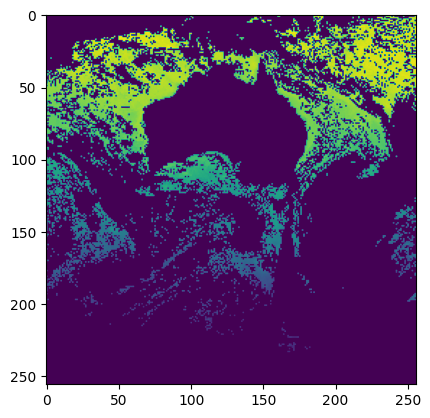

In [8]:
da_surface_temp = data['sea_surface_temperature']
da_surface_temp = da_surface_temp[[7000]]
from rio_tiler.colormap import cmap
cm = cmap.get('rdpu')

# Add CRS so rioxarray doens't complain.
da_surface_temp.rio.write_crs(4326, inplace=True)
from matplotlib.pyplot import imshow
with XarrayReader(da_surface_temp) as dst:
    print(dst.info())
    img = dst.tile(3, 2, 2, tilesize=256)
    img.rescale(
        in_range=((260, 320),),
        out_range=((-20, 255),)
    )
    # img.render(colormap=cm)
    # img
    imshow(img.data_as_image())

In [93]:
import rioxarray 
import xarray
from matplotlib.pyplot import imshow
from rio_tiler.io import XarrayReader
import requests

credential = requests.get("https://planetarycomputer.microsoft.com/api/sas/v1/token/daymet-daily-pr").json()["token"]

url = "az://daymet-zarr/annual/pr.zarr"
storage_options = {
    "account_name": "daymeteuwest",
    "credential": credential
}
src = xarray.open_dataset(url, engine="zarr", decode_coords="all", storage_options=storage_options)
src


ValueError: IndexVariable objects must be 1-dimensional

In [ ]:
with XarrayReader(src["prcp"][:1]) as dst:
    img = dst.tile(1, 1, 2)
    imshow(img.data_as_image())